### 1. Import the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import pickle

### 2. Import the Dataset

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head(5)

,Diabetes,High BP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,Heart Disease,Physical Activity,Fruits,...,Any Healthcare,No Doctor due to Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### 3. EDA

In [4]:
df.shape

(253680, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Diabetes               253680 non-null  float64
 1   High BP                253680 non-null  float64
 2   High Cholesterol       253680 non-null  float64
 3   Cholesterol Check      253680 non-null  float64
 4   BMI                    253680 non-null  float64
 5   Smoker                 253680 non-null  float64
 6   Stroke                 253680 non-null  float64
 7   Heart Disease          253680 non-null  float64
 8   Physical Activity      253680 non-null  float64
 9   Fruits                 253680 non-null  float64
 10  Veggies                253680 non-null  float64
 11  Alcohol Consumption    253680 non-null  float64
 12  Any Healthcare         253680 non-null  float64
 13  No Doctor due to Cost  253680 non-null  float64
 14  General Health         253680 non-nu

In [6]:
df.columns

Index(['Diabetes', 'High BP', 'High Cholesterol', 'Cholesterol Check', 'BMI',
       'Smoker', 'Stroke', 'Heart Disease', 'Physical Activity', 'Fruits',
       'Veggies', 'Alcohol Consumption', 'Any Healthcare',
       'No Doctor due to Cost', 'General Health', 'Mental Health',
       'Physical Health', 'Difficulty Walking', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

array([[<Axes: title={'center': 'Diabetes'}>,
        <Axes: title={'center': 'High BP'}>,
        <Axes: title={'center': 'High Cholesterol'}>,
        <Axes: title={'center': 'Cholesterol Check'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'Heart Disease'}>,
        <Axes: title={'center': 'Physical Activity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'Alcohol Consumption'}>,
        <Axes: title={'center': 'Any Healthcare'}>,
        <Axes: title={'center': 'No Doctor due to Cost'}>,
        <Axes: title={'center': 'General Health'}>],
       [<Axes: title={'center': 'Mental Health'}>,
        <Axes: title={'center': 'Physical Health'}>,
        <Axes: title={'center': 'Difficulty Walking'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: tit

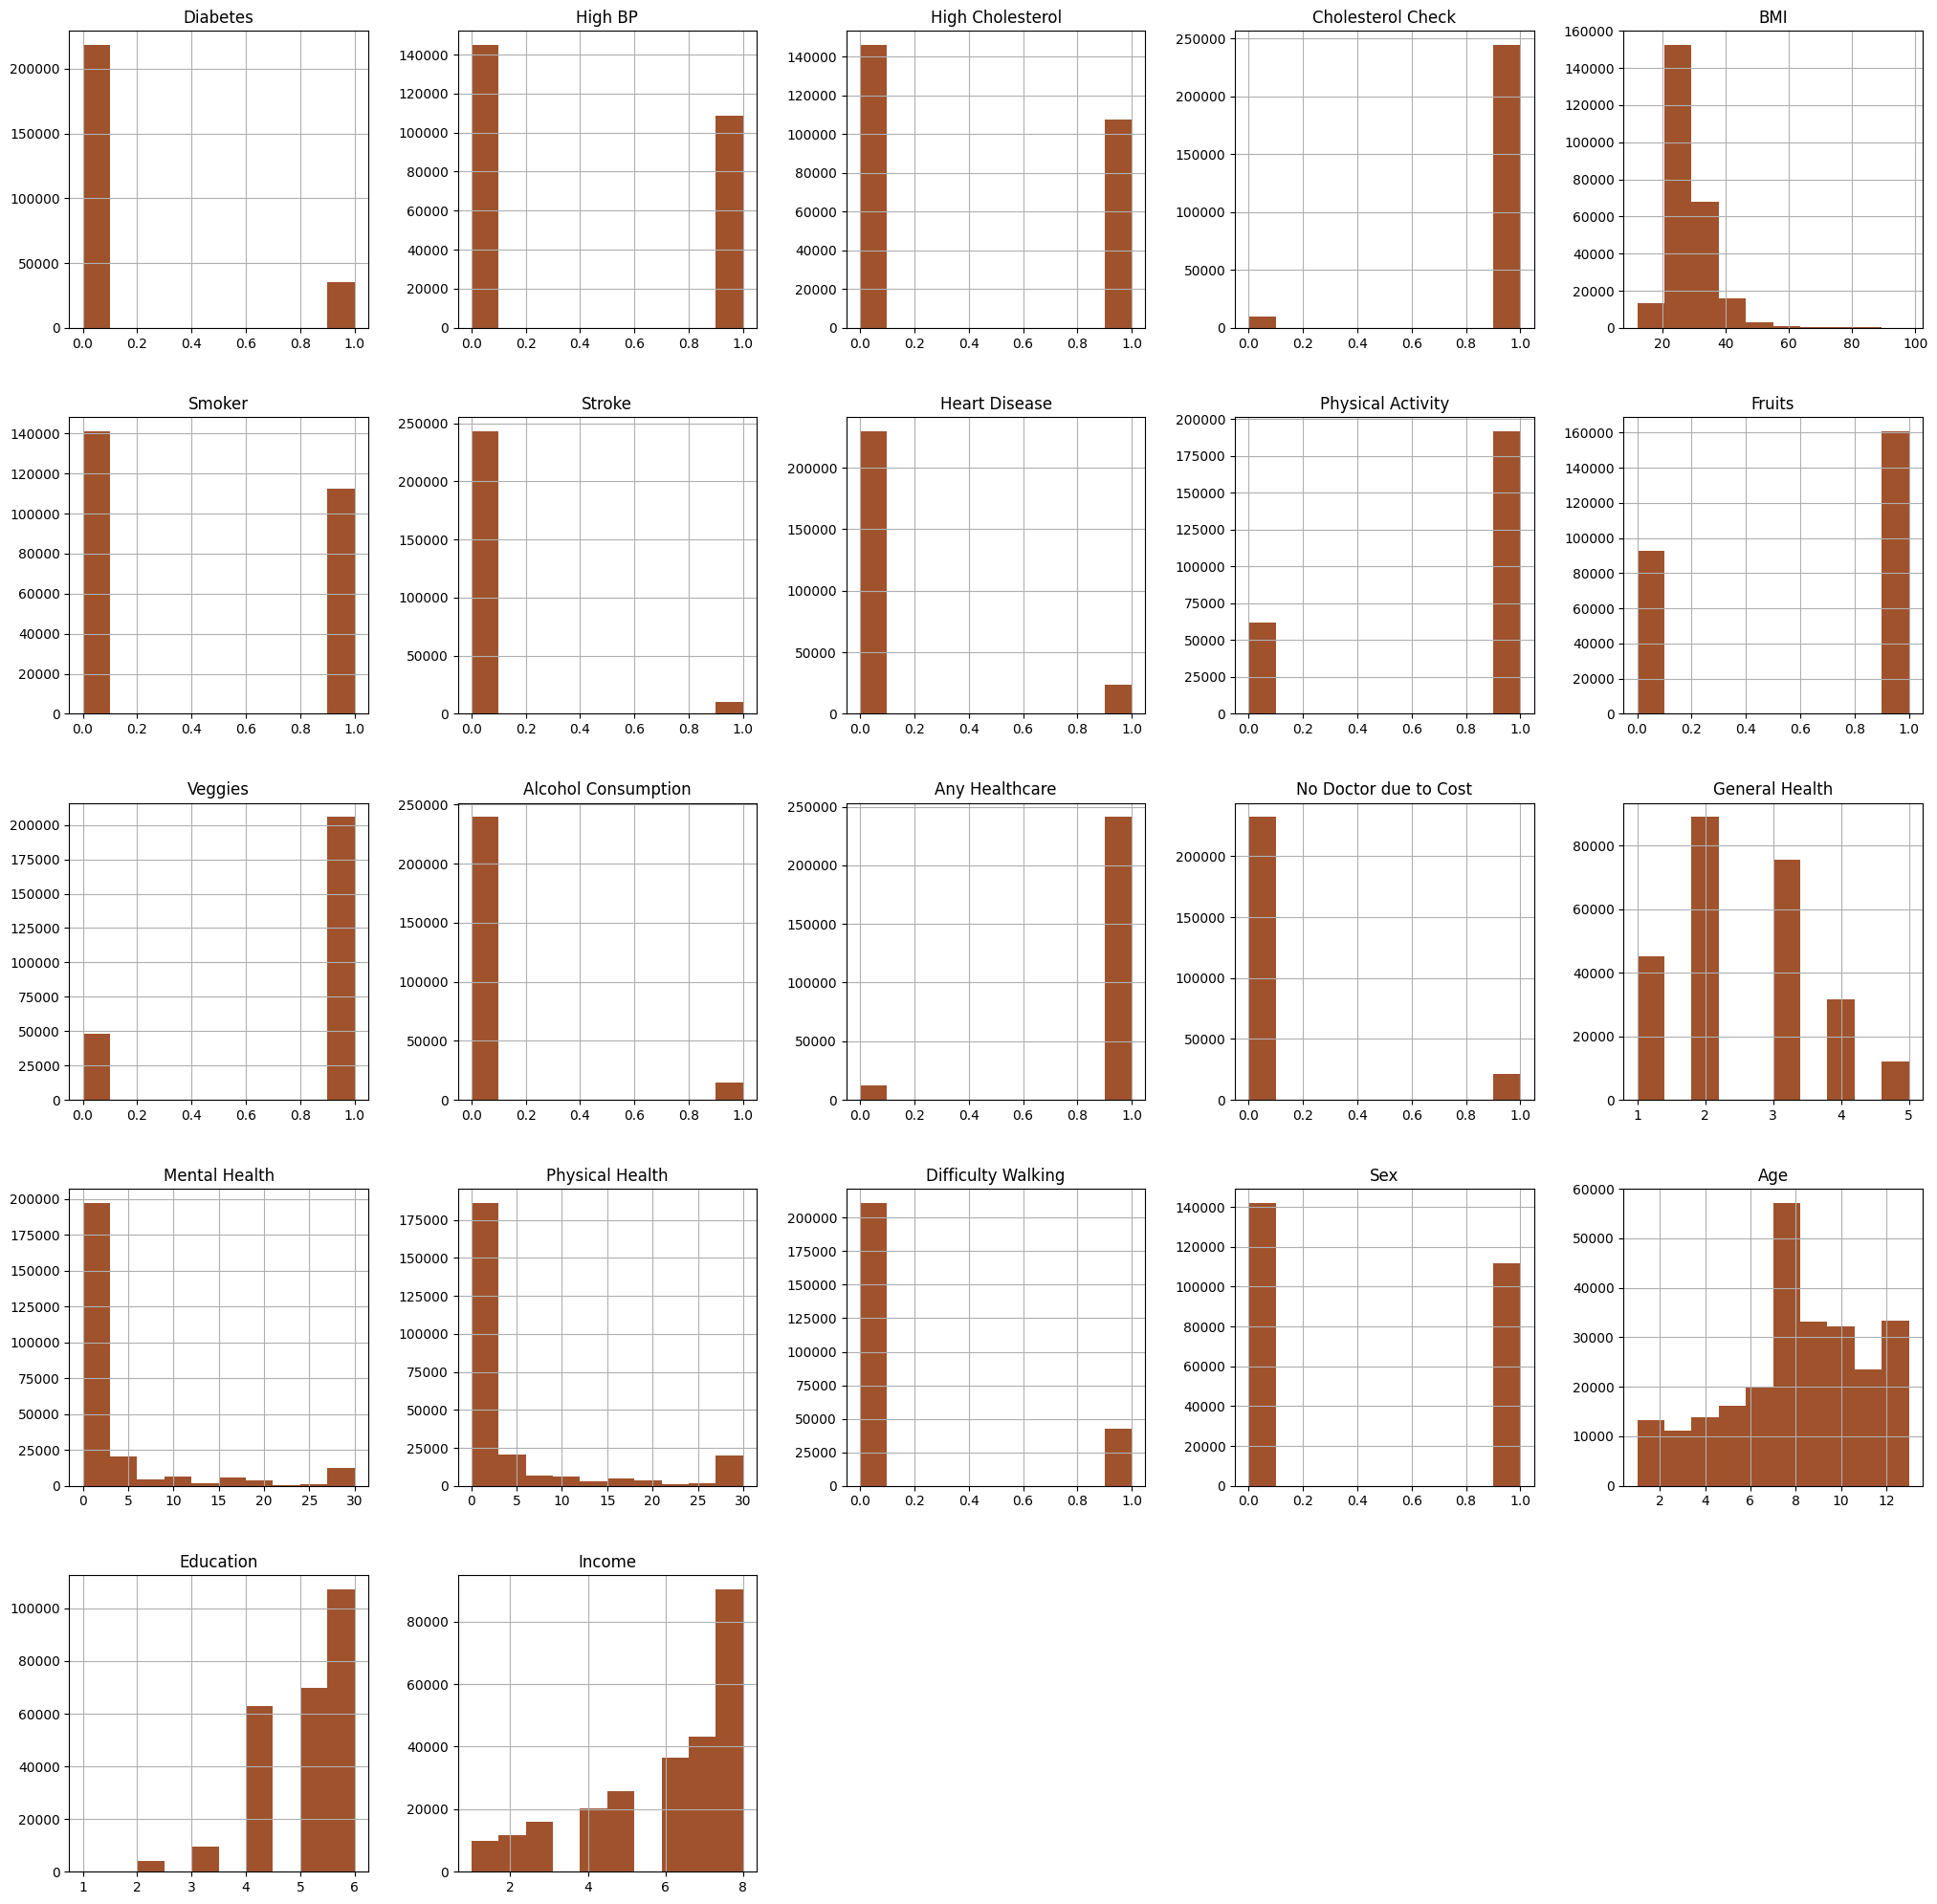

In [7]:
df.hist(figsize=(25,25), color='sienna')

In [8]:
print(df.drop('Diabetes', axis=1).columns,)

Index(['High BP', 'High Cholesterol', 'Cholesterol Check', 'BMI', 'Smoker',
       'Stroke', 'Heart Disease', 'Physical Activity', 'Fruits', 'Veggies',
       'Alcohol Consumption', 'Any Healthcare', 'No Doctor due to Cost',
       'General Health', 'Mental Health', 'Physical Health',
       'Difficulty Walking', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')


c:\Users\noora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\noora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\noora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\noora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

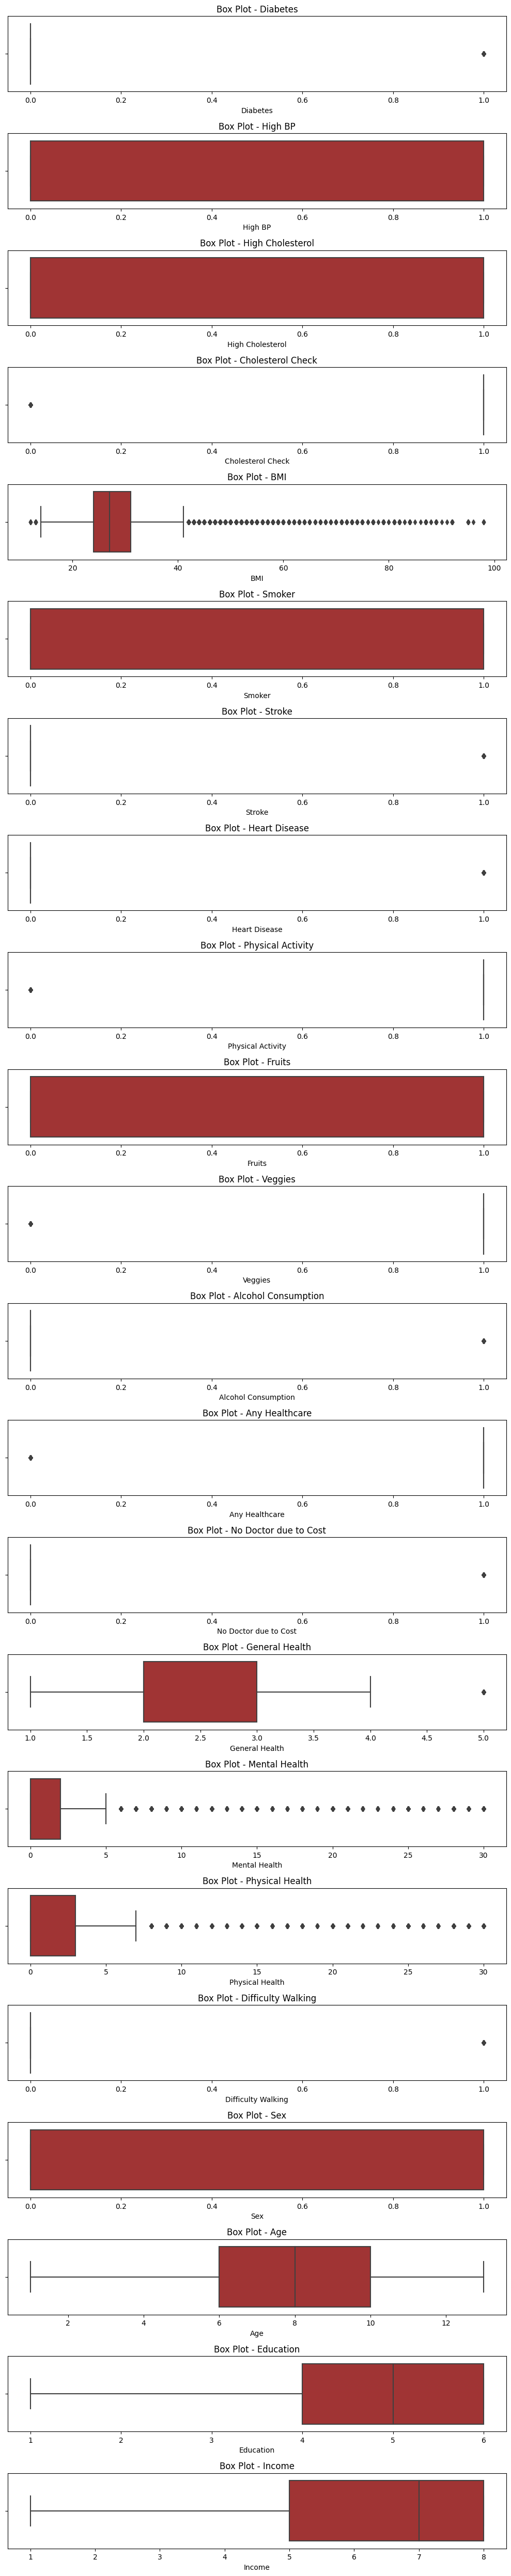

In [9]:
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(10, 50))

# Create box plots for each column using a for loop
colors = sns.color_palette('coolwarm')
for i, column in enumerate(df.columns):
    sns.boxplot(x=df[column], ax=axes[i], color='firebrick')
    axes[i].set_title(f'Box Plot - {column}')

plt.tight_layout()
plt.show()

In [10]:
from scipy.stats.mstats import winsorize

df['BMI'] = winsorize(df['BMI'], limits=(0.01, 0.0738))
df['Physical Health'] = winsorize(df['Physical Health'], limits=(0, 0.17))
df['Mental Health'] = winsorize(df['Mental Health'], limits=(0, 0.15))

c:\Users\noora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\noora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\noora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\noora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

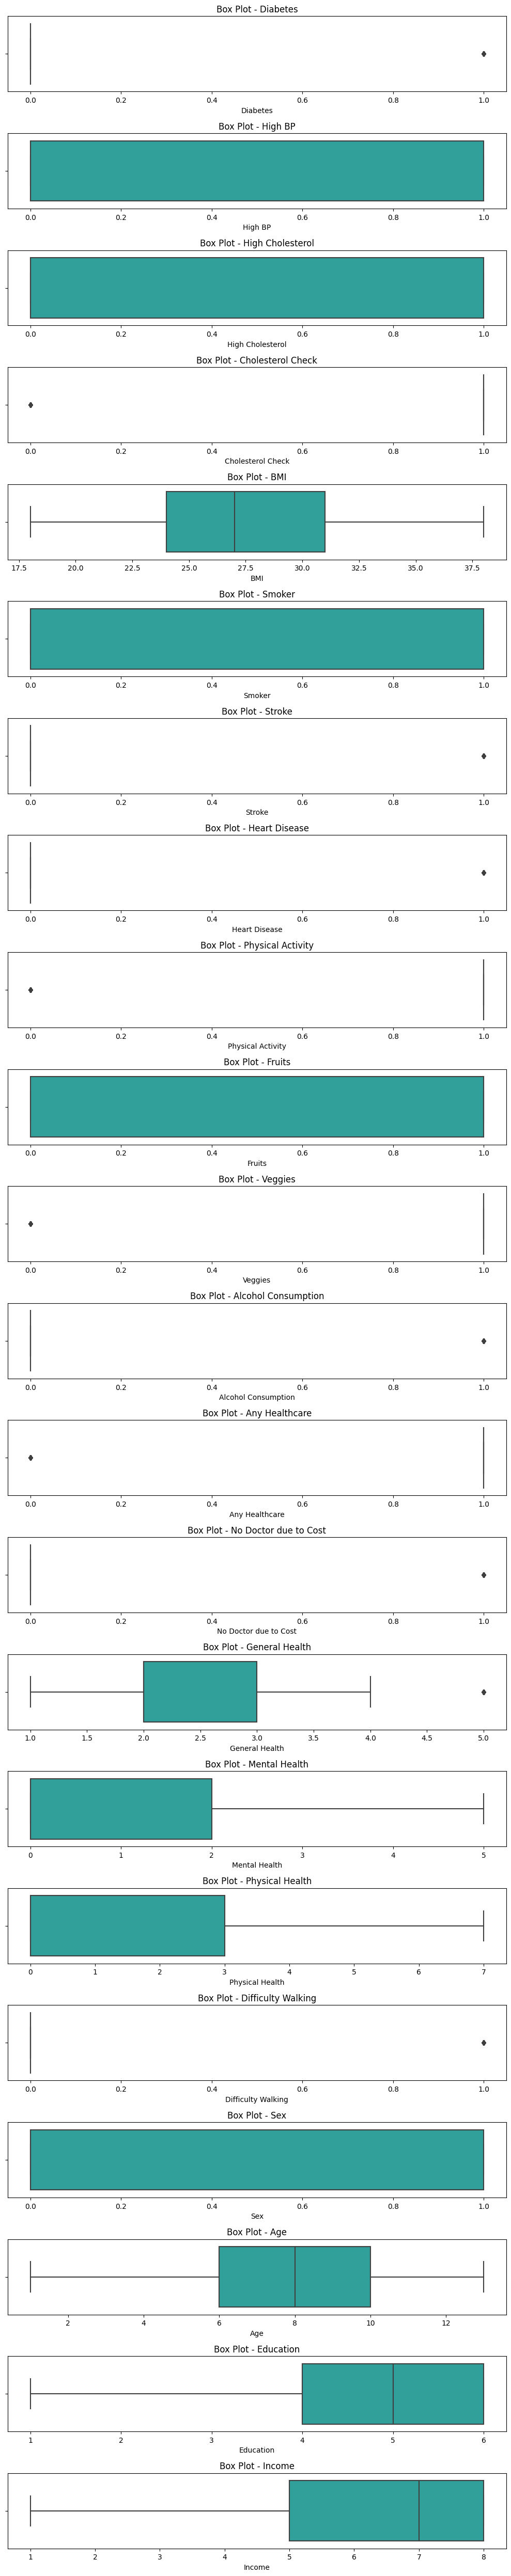

In [11]:
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(10, 50))

# Create box plots for each column using a for loop
colors = sns.color_palette('coolwarm')
for i, column in enumerate(df.columns):
    sns.boxplot(x=df[column], ax=axes[i], color='lightseagreen')
    axes[i].set_title(f'Box Plot - {column}')

plt.tight_layout()
plt.show()

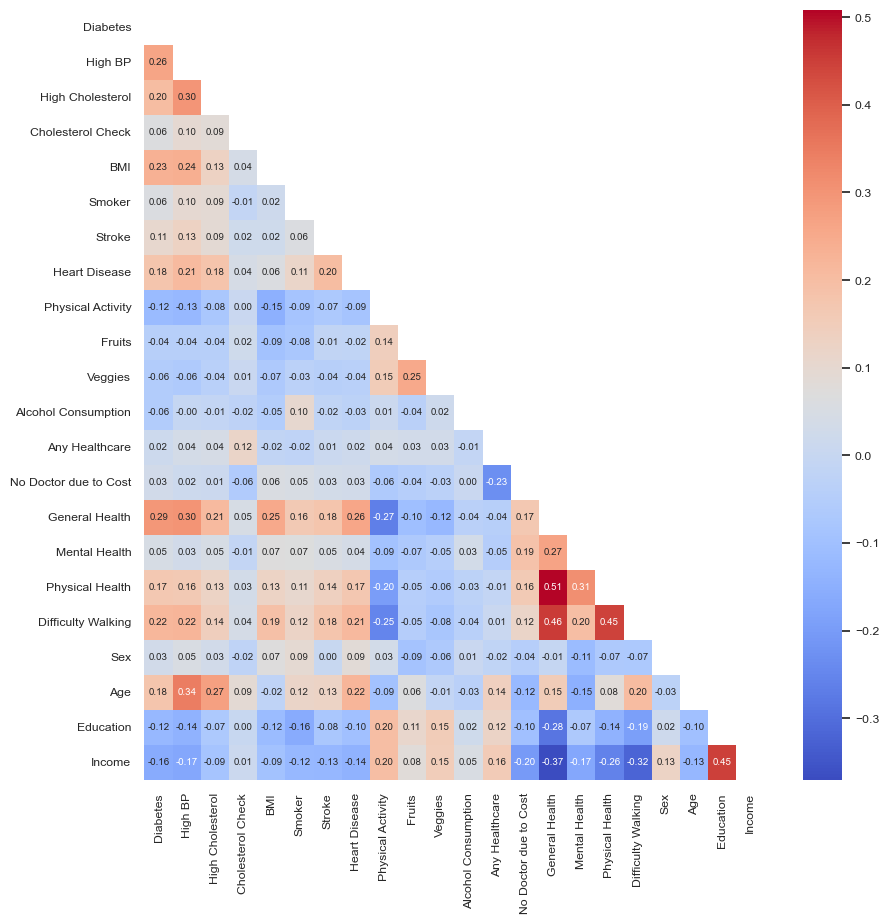

In [12]:
pd.set_option('display.float_format', '{:.1f}'.format)
plt.figure(figsize = (10,10))
sns.set(font_scale=0.8, style='white')
font = {'family': 'sans-serif', 'style': 'normal', 'size': 7}
plt.rc('font', **font)
sns.heatmap(df.corr(), annot = True, fmt='.2f', cmap = "coolwarm", mask=np.triu(df.corr()))
plt.show()

In [13]:
df = df.drop(['Physical Activity', 'Fruits', 'Veggies', 'Any Healthcare', 'Cholesterol Check', 'Smoker', 
              'No Doctor due to Cost','Sex', 'Education', 'Income'], axis = 1)

c:\Users\noora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\noora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\noora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Diabetes', ylabel='count'>

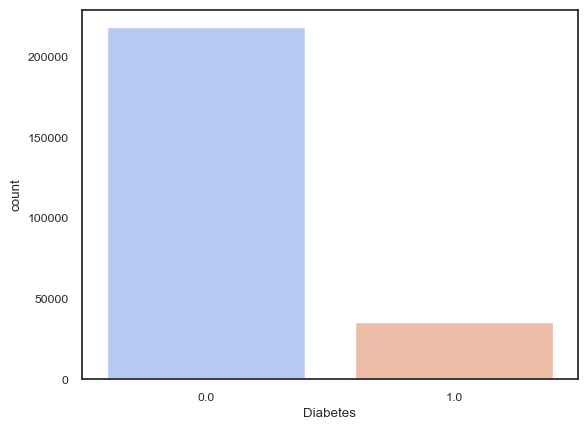

In [14]:
sns.countplot(df, x='Diabetes', palette='coolwarm')

#### 3.4 Balancing the Dataset

In [15]:
diabetes_0 = df[df['Diabetes'] == 0]
diabetes_1 = df[df['Diabetes'] == 1]

diabetes_1_balance = diabetes_1.sample(len(diabetes_0), replace=True)

df1 = pd.concat([diabetes_1_balance, diabetes_0], axis=0)

c:\Users\noora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\noora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\noora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Diabetes', ylabel='count'>

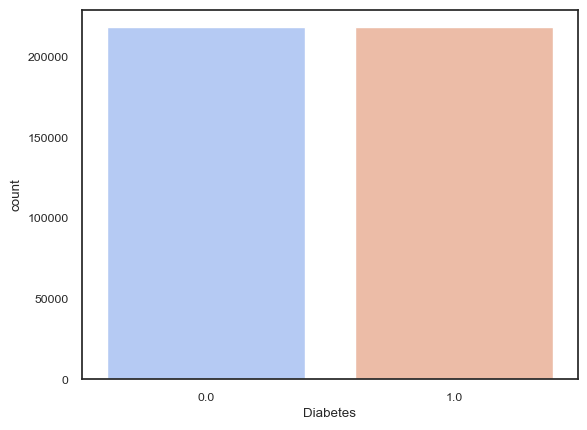

In [16]:
sns.countplot(df1, x='Diabetes', palette='coolwarm')

In [17]:
X = df1.drop('Diabetes', axis=1)
y = df1['Diabetes']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42, shuffle=True)

### 4. Model Building

In [19]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=0),
    'XGBoost': xgb.XGBClassifier()
}

In [20]:
metrics = {'accuracy': make_scorer(accuracy_score),
           'f1': make_scorer(f1_score),
           'recall': make_scorer(recall_score),
           'precision': make_scorer(precision_score),
           'auc': make_scorer(roc_auc_score)}

In [21]:
test_results = pd.DataFrame(columns=['Model', 'Accuracy', 'F1-score', 'Recall', 'Precision', 'AUC'])

C:\Users\noora\AppData\Local\Temp\ipykernel_13536\426963113.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  test_results = test_results._append({'Model': name,


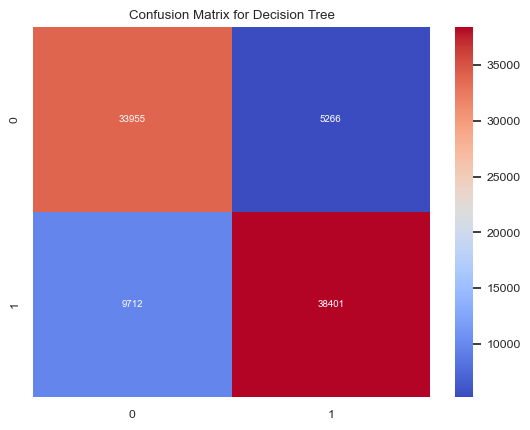

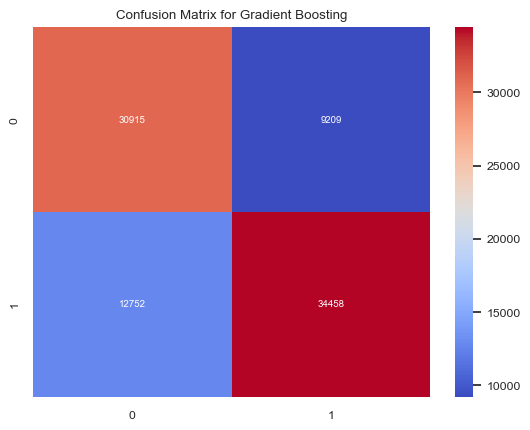

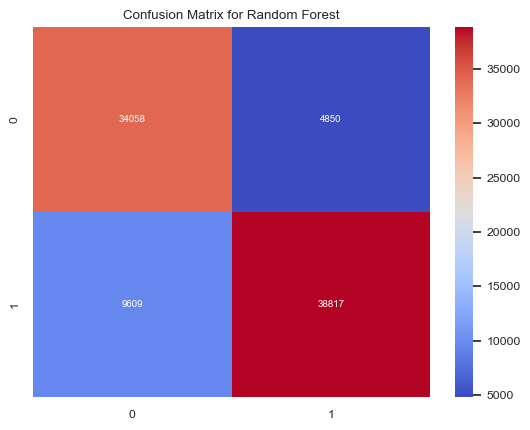

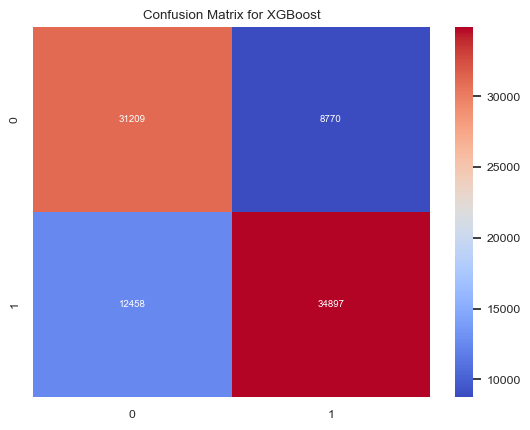

In [22]:
for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)

    pd.set_option('display.float_format', '{:.2f}'.format)

    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    
    test_results = test_results._append({'Model': name, 
                                        'Accuracy': test_accuracy, 
                                        'F1-score': test_f1, 
                                        'Recall': test_recall, 
                                        'Precision': test_precision, 
                                        'AUC': test_auc}, ignore_index=True)
    
    cm = confusion_matrix(y_pred_test, y_test)
    sns.heatmap(cm, annot=True, fmt='1', cmap='coolwarm')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

In [23]:
df_test_results = test_results.sort_values(by=['Accuracy'], ascending=[False])

In [24]:
display(df_test_results)

,Model,Accuracy,F1-score,Recall,Precision,AUC
2,Random Forest,0.83,0.84,0.89,0.80,0.83
0,Decision Tree,0.83,0.84,0.88,0.80,0.83
3,XGBoost,0.76,0.77,0.80,0.74,0.76
1,Gradient Boosting,0.75,0.76,0.79,0.73,0.75


### 5. Best Model - Regression

In [25]:
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)
y_pred_rfc = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rfc)
print('Accuracy:{:.2f}'.format(accuracy))

Accuracy:0.83


In [26]:
predictive_input = [1, 1, 48, 0, 0, 1, 4, 25, 22, 0, 7]
predictive_input_array = np.asarray(predictive_input).reshape(1, -1)
prediction = classifier.predict(predictive_input_array)
print('Prediction: ',prediction)

if (prediction[0] == 1):
    print('Diabetic')
else:
    print('Non-Diabetic')

Prediction:  [0.]
Non-Diabetic


c:\Users\noora\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### 6. Save the Model

In [27]:
filename = 'classifier_model.sav'
pickle.dump(classifier, open(filename, 'wb'))